In [1]:
from itertools import product
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
from matplotlib.lines import Line2D

plt.rc('figure', facecolor='w')

In [2]:
def read_sd(filename):
    return np.loadtxt(filename).T

def plot_sd_single(ax, filename, color):
    x, y = read_sd(filename)
    ax.plot(x, y, color=color)
    
def get_lambda(x, y):
    dx = x[1]-x[0]
    return np.sum(y[80:]/x[80:])*dx

def plot_sd(ax, qm, mm, ml):
    plot_sd_single(ax, qm, '#33a02c')
    plot_sd_single(ax, mm, '#e31a1c')
    plot_sd_single(ax, ml, '#1f77b4')

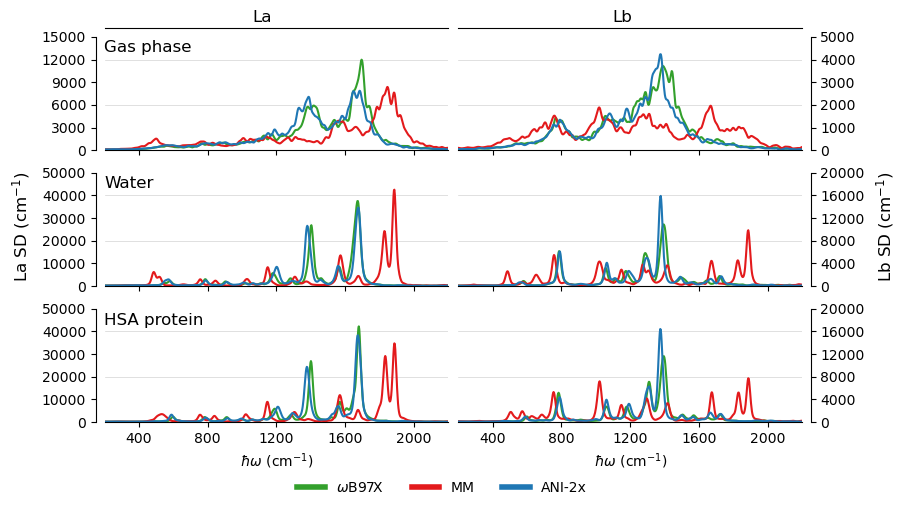

In [3]:
filenames_dict = {
    'La': {
        'Gas phase': [
            'wB97X/wB97X_gas_La_SD.dat',
            'wB97X/MM_gas_La_SD.dat',
            'wB97X/ANI-2x_gas_La_SD.dat',
        ],
        'Water': [
            'wB97X/wB97X_ElEmb_La_SD.dat',
            'wB97X/MM_MM_La_SD.dat',
            'wB97X/ANI-2x_EMLE_La_SD.dat',
        ],
        'HSA protein': [
            'wB97X/HSA_wB97X_ElEmb_La_SD.dat',
            'wB97X/HSA_MM_MM_La_SD.dat',
            'wB97X/HSA_ANI-2x_EMLE_La_SD.dat',
        ]
    },
    'Lb': {
        'Gas phase': [
            'wB97X/wB97X_gas_Lb_SD.dat',
            'wB97X/MM_gas_Lb_SD.dat',
            'wB97X/ANI-2x_gas_Lb_SD.dat',
        ],
        'Water': [
            'wB97X/wB97X_ElEmb_Lb_SD.dat',
            'wB97X/MM_MM_Lb_SD.dat',
            'wB97X/ANI-2x_EMLE_Lb_SD.dat',
        ],
        'HSA protein': [
            'wB97X/HSA_wB97X_ElEmb_Lb_SD.dat',
            'wB97X/HSA_MM_MM_Lb_SD.dat',
            'wB97X/HSA_ANI-2x_EMLE_Lb_SD.dat',
        ]
    }
}

states = ['La', 'Lb']
systems = ['Gas phase', 'Water', 'HSA protein']

fig, axs = plt.subplots(3, 2, figsize=(9, 5), sharex=True)
fig.subplots_adjust(wspace=0.03, hspace=0.2)

ranges = [(0, 15000), (0, 5000), (0, 50000), (0, 20000), (0, 50000), (0, 20000)]

yticks = [np.arange(0, 17000, 3000),
          np.arange(0,  5500, 1000),
          np.arange(0, 51000, 10000),
          np.arange(0, 21000, 4000),
          np.arange(0, 51000, 10000),
          np.arange(0, 21000, 4000)]

for (system, state), (i, ax) in zip(product(systems, states), enumerate(axs.flatten())):
    
    plot_sd(ax, *filenames_dict[state][system])

    if i in (1, 3, 5):
        ax.yaxis.tick_right()
        ax.yaxis.set_label_position("right")
        ax.spines['left'].set_visible(False)
        ax.spines['right'].set_position(('data', 2250))
    else:
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_position(('data', 150))
        
    ax.spines['top'].set_visible(False)
    ax.set_xlim(200, 2200)
    ax.set_ylim(*ranges[i])
    ax.set_yticks(yticks[i])
    for ytick in yticks[i][2:-1:2]:
        ax.axhline(ytick, linewidth=0.5, color='lightgrey', zorder=0)
    if i > 3:
        ax.set_xticks(np.arange(400, 2001, 400))
        ax.set_xlabel('$\hbar \omega$ (cm$^{-1}$)')
        
    if i < 2:
        ax.axhline(y=ranges[i][1] * 1.08, xmin=0, xmax=1, color='black', linewidth=0.8, clip_on=False)
    
custom_lines = [Line2D([0], [0], color='#33a02c', lw=4),
                Line2D([0], [0], color='#e31a1c', lw=4),
                Line2D([0], [0], color='#1f77b4', lw=4)]
plt.figlegend(custom_lines, 
              ['$\omega$B97X', 'MM', 'ANI-2x'], 
              loc='lower center', 
              ncol=3,
              bbox_to_anchor=(0.5, -0.06),
              frameon=False)

fig.text(0.3, 0.91, 'La', ha='center', fontsize='large')
fig.text(0.7, 0.91, 'Lb', ha='center', fontsize='large')

fig.text(0.125, 0.85, 'Gas phase', ha='left', fontsize='large')
fig.text(0.125, 0.577, 'Water', ha='left', fontsize='large')
fig.text(0.125, 0.305, 'HSA protein', ha='left', fontsize='large')

fig.text(0.02, 0.5, 'La SD (cm$^{-1}$)', va='center', rotation='vertical', fontsize='large')
fig.text(0.98, 0.5, 'Lb SD (cm$^{-1}$)', va='center', rotation='vertical', fontsize='large')

fig.savefig('Fig4.png', dpi=300, bbox_inches='tight')
plt.show()